In [120]:
import pandas as pd
import numpy as np
import scipy as sts
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [113]:
arrest_df19 = pd.read_csv("Data/IL2019/NIBRS_ARRESTEE.csv")
incident_df19 = pd.read_csv("Data/IL2019/NIBRS_incident.csv")
merged2019 = pd.merge(incident_df19, arrest_df19, on="INCIDENT_ID")
offense_df19 = pd.read_csv("Data/IL2019/NIBRS_OFFENSE_TYPE.csv")
merged2019 = pd.merge(merged2019, offense_df19, on="OFFENSE_TYPE_ID")
arrest_df09 = pd.read_csv("Data/IL2009/nibrs_arrestee.csv")
incident_df09 = pd.read_csv("Data/IL2009/nibrs_incident.csv")
merged2009 = pd.merge(incident_df09, arrest_df09, on="incident_id")
offense_df09 = pd.read_csv("Data/IL2009/NIBRS_OFFENSE_TYPE.csv")
merged2009 = merged2009.merge(offense_df09, left_on='offense_type_id' , right_on='offense_type_id')
#merged2019.to_csv('file_out.csv',  encoding='utf-8',index=True)

In [134]:
# This is to clean the data by removing columns that we will not use
clean2019 = merged2019.drop(columns = ['DATA_YEAR_x',  'AGENCY_ID',  'NIBRS_MONTH_ID',  'CARGO_THEFT_FLAG',  'SUBMISSION_DATE','REPORT_DATE_FLAG', 'CLEARED_EXCEPT_DATE',
                                        'INCIDENT_STATUS','DATA_HOME',  'ORIG_FORMAT','DATA_YEAR_y',  'ARRESTEE_SEQ_NUM', 'AGE_ID','UNDER_18_DISPOSITION_CODE',  'CLEARANCE_IND',
                                        'AGE_RANGE_LOW_NUM',  'AGE_RANGE_HIGH_NUM', 'DID'])
clean2009 = merged2009.drop(columns = [  'agency_id',  'nibrs_month_id',  'cargo_theft_flag',  'submission_date','report_date_flag', 'cleared_except_date',  'incident_status','data_home',
                                        'orig_format', 'arrestee_id', 'arrestee_seq_num', 'age_id','under_18_disposition_code', 'clearance_ind', 'age_range_low_num', 
                                       'age_range_high_num', 'incident_number','ddocname', 'ff_line_number_x','did', 'arrest_num', 'ff_line_number_y'])

In [135]:
# This is to convert date object into datetime format so we can extract the month number
merged2019['MONTH_#'] = pd.DatetimeIndex(merged2019['INCIDENT_DATE']).month
merged2019['MONTH'] = merged2019['INCIDENT_DATE'].str.split('-' , expand=True)[1]
merged2009['MONTH_1'] = merged2009['incident_date'].str.split('-' , expand=True)[1]
merged2009['MONTH_#'] = pd.to_datetime(merged2009['incident_date'])
merged2009['MONTH'] = merged2009['MONTH_#'].dt.strftime('%b')

In [191]:
# This is to create a data subset of the violent and non-violent crimes and then count each category
# Using the the reindex function to order the data by month, staring in Jan
violent9 = merged2009.loc[merged2009['VIOLENT_CRIME'] == 'Y']
v_count9 = violent9.groupby(['MONTH'])['incident_id'].count()
non_violent9 = merged2009.loc[merged2009['VIOLENT_CRIME'] == 'N']
n_count9 = non_violent9.groupby(['MONTH'])['incident_id'].count()
xm9 = ['Jan', 'Feb' , 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]
v_count9=v_count9.reindex(xm9, axis=0)
n_count9=n_count9.reindex(xm9, axis=0)

violent19 = merged2019.loc[merged2019['VIOLENT_CRIME'] == 'Y']
v_count19 = violent.groupby(['MONTH'])['INCIDENT_ID'].count()
non_violent19 = merged2019.loc[merged2019['VIOLENT_CRIME'] == 'N']
n_count19 = non_violent.groupby(['MONTH'])['INCIDENT_ID'].count()
n_count19

MONTH
APR     99
AUG     84
DEC     69
FEB     94
JAN    115
JUL     83
JUN     79
MAR    103
MAY    101
NOV     51
OCT     85
SEP     79
Name: INCIDENT_ID, dtype: int64

In [193]:
xm19 = ['JAN', 'FEB' , 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC' ]
v_count19=v_count19.reindex(xm19, axis=0)
n_count19=n_count19.reindex(xm19, axis=0)


MONTH
Jan    299
Feb    290
Mar    383
Apr    397
Jun    339
Jul    357
Aug    360
Sep    378
Oct    351
Nov    324
Dec    349
Name: incident_id, dtype: int64

In [185]:
# Here is where we combine the violent and non-violent crimes for our plot
v_n_combined9 = pd.merge(v_count9, n_count9, left_index=True, right_index=True)
v_n_combined9.rename(columns={'incident_id_x': 'VIOLENT' , 'incident_id_y' : 'NON_VIOLENT' }, inplace=True)
v_n_combined19 = pd.merge(v_count19, n_count19, left_index=True, right_index=True)
v_n_combined19.rename(columns={'INCIDENT_ID_x': 'VIOLENT' , 'INCIDENT_ID_y' : 'NON_VIOLENT' }, inplace=True)


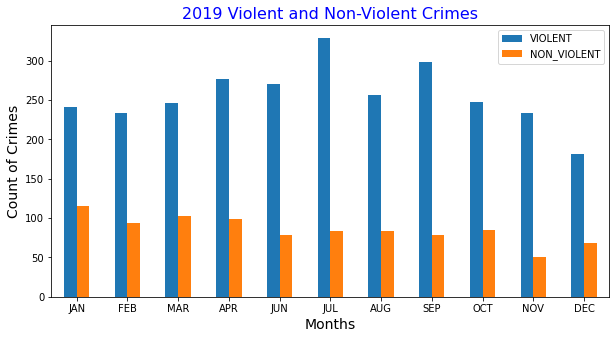

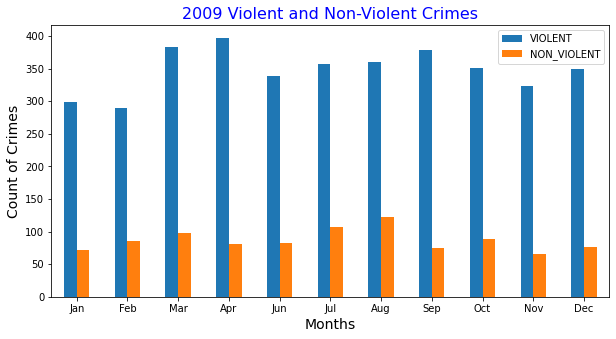

In [186]:
# Here is where we create our plots, next time I need to spend more time and use seaborn instead
v_n_combined19.plot.bar(figsize=(10, 5), rot=0)
plt.title('2019 Violent and Non-Violent Crimes', size=16, color='B')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Count of Crimes', fontsize=14)
v_n_combined9.plot.bar(figsize=(10, 5), rot=0)
plt.title('2009 Violent and Non-Violent Crimes', size=16, color='B')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Count of Crimes', fontsize=14);